In [50]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from costs import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [203]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [195]:
def split_data(y, x, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    
    train_size = round(x.shape[0] * ratio)
    indexes = np.arange(x.shape[0])
    np.random.shuffle(indexes)
    
    
    train_indexes = indexes[:train_size]
    test_indexes = np.setdiff1d(indexes, train_indexes)    
    x_train = x[train_indexes,:]
    y_train = y[train_indexes]
    
    x_test = x[test_indexes,:]
    y_test = y[test_indexes]
    
    return x_train, x_test, y_train, y_test

## Data preprocessing

In [204]:
import pandas as pd
tX_pd = pd.DataFrame(tX)
tX_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2.0,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1.0,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1.0,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [176]:
for i in range(0,30):
    s = tX_pd[tX_pd[i]==-999].index.size
    if s > 900:
        print(i, s)
        #if (i!=4):
            #tx_test = tX_pd.drop(i, axis=1)

0 38114
4 177457
5 177457
6 177457
12 177457
23 99913
24 99913
25 99913
26 177457
27 177457
28 177457


In [130]:
uno = np.where(tX==-999,1,0)
s = np.sum(uno,axis=0)
index = np.argwhere(s > 100000)
new = np.delete(tX,index[1:],axis=1)

In [131]:
uno = np.where(new==-999,1,0)
s = np.sum(uno,axis=0)
index = np.argwhere((s>40000)&(s < 100000))
new = np.delete(new,index[1:],axis=1)

In [132]:
uno = np.where(new==-999,1,0)
s = np.sum(uno,axis=0)
index = np.argwhere((s<40000)&(s>1))
prima = new[:,index]
index_ = np.argwhere(prima==-999)
prima_new = np.delete(prima, index_)
media = np.median(prima_new)
prima[prima==-999] = media
new[:,index] = prima

uno = np.where(new==-999,1,0)
s = np.sum(uno,axis=0)
index = np.argwhere((s>40000)&(s < 100000))
prima = new[:,index]
index_ = np.argwhere(prima==-999)
prima_new = np.delete(prima, index_)
media = np.median(prima_new)
prima[prima==-999] = media
new[:,index] = prima

uno = np.where(new==-999,1,0)
s = np.sum(uno,axis=0)
index = np.argwhere(s > 100000)
prima = new[:,index]
index_ = np.argwhere(prima==-999)
prima_new = np.delete(prima, index_)
media = np.median(prima_new)
prima[prima==-999] = media
new[:,index] = prima

In [133]:
tX = new

In [205]:
drops = [5,6,12,24,25,26,27,28,29]

In [206]:
tX_pd.drop(drops, axis=1, inplace=True)

In [126]:
tx_test=tX_pd
for col in tX_pd.columns:
    s = tX_pd[tX_pd[col]==0].index.size
    if s >= 0:
        print(col, s)

0 0
1 3
2 0
3 41
4 6
5 0
6 58
7 0
8 39
9 0
10 0
11 53
12 15752
13 0
14 0
15 32
16 0
17 35
18 33
19 0
20 44
21 0
22 99913
23 0
24 26
25 19
26 0
27 9
28 10
29 99913


In [88]:
tX_pd.describe()

,0,1,2,3,4,7,8,9,10,11,...,15,16,17,18,19,20,21,22,23,29
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.420675,2.373100,18.917332,158.432217,1.437609,-0.128305,...,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,73.064591
std,406.345647,35.344886,40.828691,63.655682,454.480565,0.782911,22.273494,115.706115,0.844743,1.193585,...,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,98.015662
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,...,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,0.000000
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,...,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,0.000000
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,...,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,40.512500
75%,130.606250,73.598000,92.259000,79.169000,0.490000,2.961000,27.591000,200.478250,1.777000,1.225000,...,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,109.933750
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,5.684000,2834.999000,1852.462000,19.773000,1.414000,...,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,1633.433000


In [179]:
tX_pd.columns.size

21

In [207]:
tX_clean = tX_pd.values
tX_clean.shape

(250000, 21)

In [208]:
tX = tX_clean

In [209]:
#normalize data
from helpers import *
tX, mean_x, std_x = standardize(tX)

In [9]:
tX.shape

(250000, 23)

In [10]:
tX

array([[ 0.61210652,  0.27263912,  0.45318267, ...,  0.07906273,
         0.07239186,  0.51445612],
       [ 0.69995786,  0.33955504,  0.47432925, ...,  0.07349064,
         0.07518377,  0.25141043],
       [-3.83567311,  0.70478701,  0.56316206, ...,  0.07868344,
         0.06272575,  0.24368771],
       ...,
       [ 0.4830178 ,  0.30732685,  0.36720434, ...,  0.07769415,
         0.07000662,  0.23485448],
       [ 0.44193683,  0.14636577,  0.33972709, ..., -3.83567311,
        -3.83567311,  0.07065572],
       [-3.83567311,  0.35514907,  0.34762186, ..., -3.83567311,
        -3.83567311,  0.07065572]])

In [11]:
#polynomial basis
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    for d in range (0, degree+1):
        if d==0:
            psi=np.power(x,d)
        else:
            psi = np.hstack((psi, np.power(x,d)))
    return psi


In [13]:
def build_poly_2(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    d = np.arange(0, degree+1).repeat(x.shape[1])
    psi = np.tile(x, degree+1)
    psi = np.power(psi, d)
    return psi

In [16]:
xpoly = build_poly_2(tX,2)
xpoly.shape

(250000, 69)

In [13]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [20]:
from costs import *
def compute_rmse(y, x, w):
    l = compute_loss(y, x, w)
    return np.math.sqrt(2*l)

In [14]:
import matplotlib.pyplot as plt

def cross_validation(y, x, k_indices, k, lambda_, degree, mean=True):
    """return the loss of ridge regression."""
    losses_tr = []
    losses_te = []
    for k_group in range(k):
        index_te = k_indices[k_group]
        index_tr = np.setdiff1d(np.arange(len(y)), index_te)
        x_te = x[index_te]
        x_tr = x[index_tr]
        y_te = y[index_te]
        y_tr = y[index_tr]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
        x_te_poly = build_poly(x_te, degree)
        x_tr_poly = build_poly(x_tr, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
        w = ridge_regression(y_tr, x_tr_poly, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
        rmse_tr = compute_rmse(y_tr, x_tr_poly, w)
        rmse_te = compute_rmse(y_te, x_te_poly, w)
        losses_tr.append(rmse_tr)
        losses_te.append(rmse_te)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    if mean==True:
        loss_tr = np.mean(losses_tr)
        loss_te = np.mean(losses_te)
    else:
        loss_tr = losses_tr
        loss_te = losses_te
    return loss_tr, loss_te

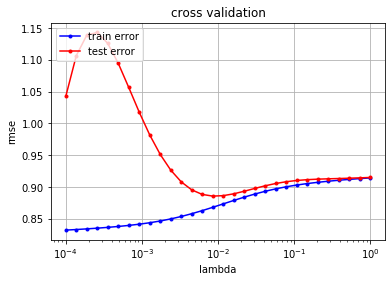

In [23]:
from plots_lab4 import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 3
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    #lambdas =[0.1, 0.01, 1]
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    for lambda_ in lambdas:
        loss_tr, loss_te = cross_validation(y, tX, k_indices, k_fold, lambda_, degree)
        rmse_tr.append(loss_tr)
        rmse_te.append(loss_te)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

In [12]:
from helpers import *

In [13]:
def compute_loss(y, tx, w):
    e = y - np.dot(tx,w)
    N = len(y)
    L=e.T.dot(e)/(2*N)
    return L

In [14]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    e=y-tx.dot(w)
    N=len(y)
    return -(np.transpose(tx).dot(e))/N

In [219]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    w = initial_w
    loss = np.inf
    for n_iter in range(max_iters):
        g = compute_gradient(y, tx, w)
        new_w = w - gamma*g;
        new_loss = compute_loss(y, tx, new_w)
        # print TO DELETE IN FINAL VERSION
        if new_loss <= loss:
            loss, w = new_loss, new_w
            gamma *=1.8 #accelerate algorithm learning rate
            #print("Gradient Descent({bi}/{ti}): loss={l} ; gamma={g}; gamma aumenta".format(
             # bi=n_iter, ti=max_iters - 1, l=loss, g= gamma))
        else:
            gamma *=0.3 #decelerate to avoid exponential growing
            #print("Gradient Descent({bi}/{ti}): loss={l} ; gamma={g}; gamma diminuisce".format(
             # bi=n_iter, ti=max_iters - 1, l=loss, g= gamma)
        print("Gradient Descent({bi}/{ti}): ||gradient||={grad}, loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, grad=np.linalg.norm(g), l=loss, w0=w[0], w1=w[1]))

    return w, loss

In [230]:
# Define the parameters of the algorithm.
max_iters = 200
gamma = 0.0001

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start gradient descent.
gradient_w, gradient_loss = gradient_descent(y, tX, w_initial, max_iters, gamma)

Gradient Descent(0/199): ||gradient||=841.1056518611562, loss=20011.433828797766, w0=0.010766649510400012, w1=-0.0027284198603999992
Gradient Descent(1/199): ||gradient||=478994.9203081395, loss=20011.433828797766, w0=0.010766649510400012, w1=-0.0027284198603999992
Gradient Descent(2/199): ||gradient||=478994.9203081395, loss=20011.433828797766, w0=0.010766649510400012, w1=-0.0027284198603999992
Gradient Descent(3/199): ||gradient||=478994.9203081395, loss=20011.433828797766, w0=0.010766649510400012, w1=-0.0027284198603999992
Gradient Descent(4/199): ||gradient||=478994.9203081395, loss=20011.433828797766, w0=0.010766649510400012, w1=-0.0027284198603999992
Gradient Descent(5/199): ||gradient||=478994.9203081395, loss=20011.433828797766, w0=0.010766649510400012, w1=-0.0027284198603999992
Gradient Descent(6/199): ||gradient||=478994.9203081395, loss=20011.433828797766, w0=0.010766649510400012, w1=-0.0027284198603999992
Gradient Descent(7/199): ||gradient||=478994.9203081395, loss=1232.20

In [94]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    e=y-tx.dot(w)
    N=len(y)
    return -(np.transpose(tx).dot(e))/N

def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    w = initial_w
    loss = np.inf
    for n_iter in range(max_iters):
        for yn, xn in batch_iter(y, tx, batch_size):
            g = compute_stoch_gradient(yn, xn, w)
            new_w = w - gamma*g;
            new_loss = compute_loss(y, tx, new_w)
        if new_loss <= loss:
            loss , w = new_loss , new_w
            gamma *=1.8
            #print("SGD({bi}/{ti}): loss={l} ; gamma={g}; gamma aumenta".format(
             # bi=n_iter, ti=max_iters - 1, l=loss, g= gamma))
        else:
            gamma *=0.3
            #print("SGD({bi}/{ti}): loss={l} ; gamma={g}; gamma diminuisce".format(
             #     bi=n_iter, ti=max_iters - 1, l=loss, g= gamma))
        print("SGD({bi}/{ti}): |gradient|={grad}, loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, grad=np.linalg.norm(g), l=loss, w0=w[0], w1=w[1]))

    return w, loss

In [99]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.01
batch_size = 1

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start SGD.
sgd_loss, sgd_w = stochastic_gradient_descent(
    y, tX, w_initial, batch_size, max_iters, gamma)


SGD(0/99): |gradient|=5.606944888677391, loss=0.6114707782168463, w0=0.006394104193840289, w1=0.005450759883688027
SGD(1/99): |gradient|=7.570340290732537, loss=0.4362372886140286, w0=0.0507102059786907, w1=-0.008130332381347041
SGD(2/99): |gradient|=3.573906656201934, loss=0.4362372886140286, w0=0.0507102059786907, w1=-0.008130332381347041
SGD(3/99): |gradient|=3.3552360099930136, loss=0.4362372886140286, w0=0.0507102059786907, w1=-0.008130332381347041
SGD(4/99): |gradient|=4.283991744813342, loss=0.43571977288915875, w0=0.049524230918568043, w1=-0.009027933449343517
SGD(5/99): |gradient|=3.214881116998168, loss=0.43571977288915875, w0=0.049524230918568043, w1=-0.009027933449343517
SGD(6/99): |gradient|=3.9249474696806628, loss=0.4354151761726099, w0=0.04857157669861133, w1=-0.00976244417735909
SGD(7/99): |gradient|=3.203119350249999, loss=0.4354151761726099, w0=0.04857157669861133, w1=-0.00976244417735909
SGD(8/99): |gradient|=3.2516736215578637, loss=0.4354151761726099, w0=0.0485715

In [15]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    D = tx.shape[1]
    G = tx.T.dot(tx)
    if(np.linalg.matrix_rank(G)==D):
        w = np.linalg.inv(G).dot(tx.T).dot(y)
    else:
        w = np.linalg.lstsq(G,tx.T.dot(y), rcond=None) [0]
    return w

In [17]:
w_ls = least_squares(y, tX)
loss = compute_loss(y, tX, w_ls)
loss

0.35214980423406766

In [153]:
# w_star = least_squares(y,xpoly)
w0 = least_squares(y,xpoly[:,:,0])
w1 = least_squares(y,xpoly[:,:,1])
w2 = least_squares(y,xpoly[:,:,2])

(250000, 30, 3)

In [ ]:
w = [w0, w1, w2]
yp = np.zeros((250000,3))
yp[:,0] = xpoly[:,:,0].dot(w0)
yp[:,1] = xpoly[:,:,1].dot(w1)
yp[:,2] = xpoly[:,:,2].dot(w2)
compute_loss(yp, xpoly, w)

In [190]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    N = len(y)
    G = tx.T.dot(tx)
    i = np.linalg.inv(G + 2*N*lambda_*np.eye(G.shape[0]))
    w_star = i.dot(tx.T).dot(y)
    return w_star

In [20]:
xpoly = build_poly(tX,7)

In [211]:
x_tr, x_te, y_tr, y_te = split_data(y,tX,0.8,1)

In [212]:
lambda_ = 0.001
w = ridge_regression(y_tr, x_tr, lambda_)
loss_tr = compute_loss(y_tr, x_tr, w)
loss_te = compute_loss(y_te, x_te, w)
print(loss_tr, loss_te)

0.37063036405320426 0.37169429181471236


## Generate predictions and save ouput in csv format for submission:

In [245]:
weights = w
weights

array([ 2.24104142e-04, -8.68280397e-03, -2.68859353e-03, -2.22470926e-03,
       -5.48363092e-03,  5.00183793e-04, -1.72285231e-02,  6.05199540e-02,
        1.57457370e-05,  3.49522005e-03, -5.39186900e-02,  6.84999623e-02,
        2.19603319e-02,  5.70895097e-03, -4.23536533e-04, -1.28871636e-03,
        3.30152909e-03, -5.20781620e-04,  9.12327144e-04,  4.86026909e-03,
        4.62605701e-04, -7.55206472e-04, -5.59287480e-02,  1.20180623e-03,
       -6.34079801e-04, -4.00651108e-04,  5.73198500e-05,  1.25042999e-03,
       -8.49579237e-04, -5.51323579e-03])

In [227]:
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [246]:
OUTPUT_PATH = '../data/submission.csv'
tX_test_s, mean_tes, std_test = standardize(tX_test)
y_pred = predict_labels(weights, tX_test_s)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [247]:
loss = compute_loss(y_pred, tX_test_s, w)
loss

0.4940938727534078

array([[-2.96637287, -1.59557484],
       [-0.96443888,  2.30659937],
       [-2.7925803 , -1.26619016],
       ...,
       [-2.78555006, -1.2651345 ],
       [-0.97573941,  2.28919741],
       [-2.80136474, -1.27570913]])

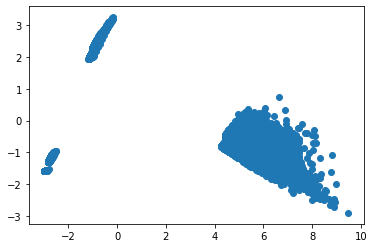

In [263]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(tX_test_s)
plt.scatter(principalComponents[:,0], principalComponents[:,1])